In [4]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.stats import skewnorm
from ll_xy import lonlat_to_xy
from scipy.stats import linregress
import datetime
import string
import cartopy
import tools
import cartopy.crs as ccrs
import pandas as pd
from dateutil.relativedelta import relativedelta
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

pd.set_option("mode.chained_assignment", None)

dep_l = pickle.load(open('../pickles/line_depths_dict.p','rb'))
statistics = pickle.load(open('../pickles/statistics.p','rb'))

np_df = pickle.load(open('../pickles/NP_df.p','rb'))

In [2]:
bw = 2

bin_edges = np.arange(0,70,bw)

bin_centres = bin_edges[1:]

all_statistics = tools.get_statistics(np_df)


tiny_bin_edges = np.arange(-2.5,4,0.05)

np_fit = skewnorm.pdf(tiny_bin_edges,all_statistics['a'],all_statistics['loc'],all_statistics['scale'])

linear_prediction = np.array([0,np.max(np_df['mean'])])*all_statistics['stats']

/home/robbie/Dropbox/sub_km/notebooks/tools.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  stats = np.linalg.lstsq(np.array(df['mean'])[:, np.newaxis], df['std'])[0][0]


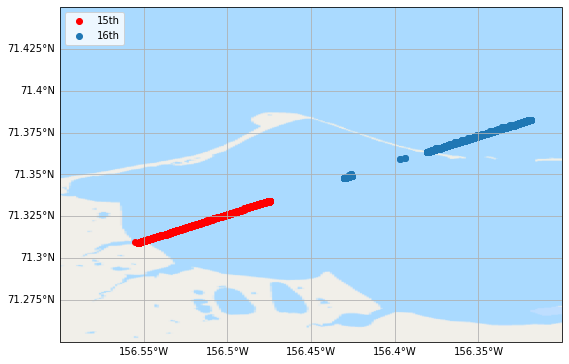

In [5]:
df1 = pd.read_excel('../AMSR snow depth/GPSMagnaProbeMar15Elson.xls')

df2 = pd.read_excel('../AMSR snow depth/GPSMagnaProbe2Mar16Elson.xls')

fig, ax = plt.subplots(figsize=(9, 9),
                       subplot_kw=dict(projection=ccrs.PlateCarree()),
                            )

extent = [-156.3,-156.6, 71.25,71.45]

ax.set_extent(extent)

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.scatter(-df1['Lon.dd.ddd'],df1['Lat.dd.ddd'],c='r',label='15th')
ax.scatter(-df2['Lon.dd.ddd'],df2['Lat.dd.ddd'],label='16th')

request = cimgt.GoogleTiles()
ax.add_image(request, 10)

plt.legend(loc='upper left')

In [97]:
df1

,Magna Probe ID,Year,Day,Hour/Minute,Seconds,GPS Voltage,Logger Voltage,Counter,Snow Depth (cm),Latitude,...,Unnamed: 15,Unnamed: 16,Latitude Degrees,Latitude Decimal Degrees,Lat.dd.ddd,Longitude Degrees,Longitude Decimal Degrees,Lon.dd.ddd,UTM Northing,UTM Easting
0,377,2006,74,1101,27,23.129,11.899,15003,25.0020,7120,...,3,0,71,0.33429,71.33429,156,0.47595,156.47595,7.916562e+06,590137.372378
1,377,2006,74,1101,42,23.084,11.906,15004,27.6470,7120,...,4,0,71,0.33429,71.33429,156,0.47595,156.47595,7.916562e+06,590137.372378
2,377,2006,74,1102,30,22.783,11.912,15005,42.2810,7120,...,4,0,71,0.33429,71.33429,156,0.47593,156.47593,7.916562e+06,590138.086239
3,377,2006,74,1103,2,22.919,11.886,15006,43.2280,7120,...,6,0,71,0.33429,71.33429,156,0.47597,156.47597,7.916562e+06,590136.658517
4,377,2006,74,1103,18,22.809,11.906,15007,4.7839,7120,...,7,0,71,0.33429,71.33429,156,0.47600,156.47600,7.916562e+06,590135.587726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,377,2006,74,1641,26,20.855,11.884,795,26.2020,7118,...,-2,0,71,0.30885,71.30885,156,0.55346,156.55346,7.913613e+06,587485.503916
1531,377,2006,74,1641,35,20.840,11.884,796,12.9730,7118,...,-1,0,71,0.30883,71.30883,156,0.55347,156.55347,7.913611e+06,587485.236716
1532,377,2006,74,1641,44,20.855,11.884,797,34.7820,7118,...,-1,0,71,0.30881,71.30881,156,0.55351,156.55351,7.913608e+06,587483.897265
1533,377,2006,74,1641,52,20.858,11.884,798,24.8920,7118,...,-1,0,71,0.30880,71.30880,156,0.55351,156.55351,7.913607e+06,587483.942372


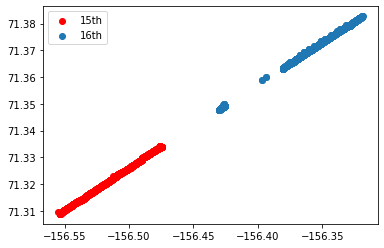

In [71]:

plt.scatter(-df1['Lon.dd.ddd'],df1['Lat.dd.ddd'],color='r',label='15th')
plt.scatter(-df2['Lon.dd.ddd'],df2['Lat.dd.ddd'],label='16th')

plt.legend()

df = df2


In [101]:
for df in [df1,df2]:
    amsr_fit_stats = skewnorm.fit(df['Snow Depth (cm)'])
    
    print(amsr_fit_stats)
    

(0.8447588819980191, 26.13185806422102, 11.870198310120132)
(5.14776872204162, 10.660678908963082, 25.295538355147357)


In [72]:
depth = np.array(df['Snow Depth (cm)'])

depth_mean = np.mean(depth)

depth_std = np.std(depth)

rel_normed_depth = (depth-depth_mean)/depth_std
                   

amsr_fit_stats = skewnorm.fit(depth)
amsr_fit = skewnorm.pdf(bin_edges,amsr_fit_stats[0],amsr_fit_stats[1],amsr_fit_stats[2])
amsr_fit_stats

(5.14776872204162, 10.660678908963082, 25.295538355147357)

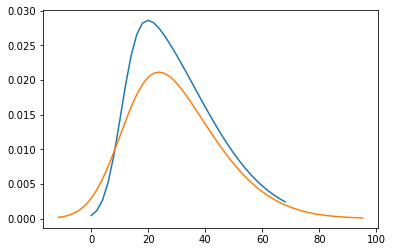

In [96]:
plt.plot(bin_edges,amsr_fit)
plt.plot((tiny_bin_edges * depth_std)+depth_mean,np_fit*(2*0.05)*0.5)

In [94]:
np.sum(np_fit*(2*0.05)*0.5), np.sum(amsr_fit)

(0.9988320253854119, 0.48928225177872264)

In [85]:
np.diff(bin_edges)[0]

2

In [86]:
d = np.diff((tiny_bin_edges * depth_std)+depth_mean)[0]

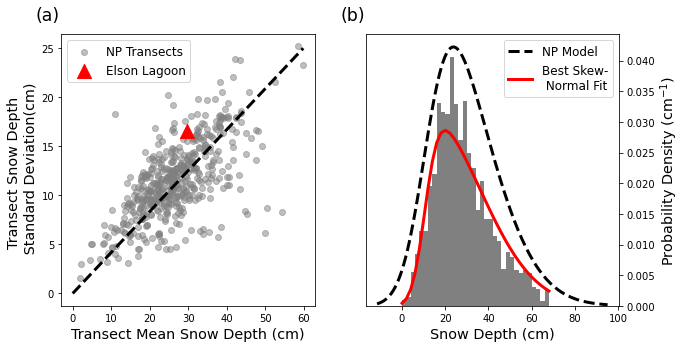

In [79]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.scatter(np_df['mean'], np_df['std'],marker='o',color='gray',alpha=0.5, label = 'NP Transects')
ax1.scatter([depth_mean], [depth_std],marker='^',color='red',s=200, label = 'Elson Lagoon')
ax1.plot([0,np.max(np_df['mean'])], linear_prediction, color='k',lw=3, ls='--')

ax1.set_ylabel('Transect Snow Depth \n Standard Deviation(cm)', fontsize='x-large')

ax1.set_xlabel('Transect Mean Snow Depth (cm)', fontsize='x-large')

ax1.legend(fontsize='large')

#######################################

ax2.plot((tiny_bin_edges * depth_std)+depth_mean, np_fit*(2*0.05), color='k',lw=3, ls='--', label='NP Model')
ax2.plot(bin_edges, amsr_fit, color='red',lw=3, label='Best Skew-\n Normal Fit')

ax2.hist(depth, bins = bin_edges, density=True,color='gray')

ax2.set_xlabel('Snow Depth (cm)', fontsize='x-large')

ax2.legend(fontsize='large')

ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position("right")

ax2.set_ylabel(r'Probability Density (cm$^{-1}$)', fontsize='x-large')


ax1.annotate(text='(a)', fontsize='xx-large', xy=(-0.1,1.05), xycoords= 'axes fraction')

ax2.annotate(text='(b)', fontsize='xx-large', xy=(-0.1,1.05), xycoords= 'axes fraction')


#######################################################################

plt.savefig('../figures/elson_lagoon.png', bbox_inches='tight',dpi=500)
plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/sub-km-snow-depth-dist/elson_lagoon.png', bbox_inches='tight',dpi=500)


In [7]:
all_statistics['a']

2.542562886886376

In [8]:
np_df['ratio'] = np_df['std']/np_df['mean']

np_df

,std,mean,norm,ratio
0,9.920743,20.584158,"[0.9491065230262345, 1.7554977644617735, 0.646...",0.481960
1,12.285984,25.693069,"[-0.30059207078844336, -0.13780494398076085, 2...",0.478183
2,11.546287,27.009901,"[-0.6071130267771289, -1.2133685492791488, -1....",0.427483
3,12.960067,31.237624,"[-0.558455736090968, -0.7127759258178838, -1.3...",0.414886
4,7.380496,23.940594,"[0.4145258012114489, 1.904940575146465, -0.669...",0.308284
...,...,...,...,...
494,12.085090,18.009901,"[0.9921397969281626, -0.24905904068221413, 1.7...",0.671025
495,14.978534,49.197802,"[-1.214925458198433, 0.5876541618459813, 0.721...",0.304455
496,15.843113,46.188119,"[-2.22103571509425, 0.5561963383325499, 0.8717...",0.343013
497,17.435291,43.637363,"[-1.1836546119648217, -0.4380404447899632, 1.3...",0.399550


In [9]:
depth.shape

(1535,)